# Real-time Factuality & Bias Detection on News Media Sources

Chia-cheng Lin,  May-chun Jai,  Yiwen Zheng,  Yiting Wang,  Yi Lu

In [2]:
%pylab inline
import pandas as pd
import os
from ipypublish import nb_setup

Populating the interactive namespace from numpy and matplotlib


## Agenda
* Problem Background
* Reference
  * Paper
  * Other Similar Product
* Data Overview
* Our Solution 
* Model Analysis
* Future Improvement

## Problem Background
* **Importance of detecting fake news and media bias**
  * Influence of fake news
  * Time sensitive
  * Factual vs. bias

* **Site level vs. article level**
  * Limitation on article level analysis
    * "About Us" pages
    * References and citations


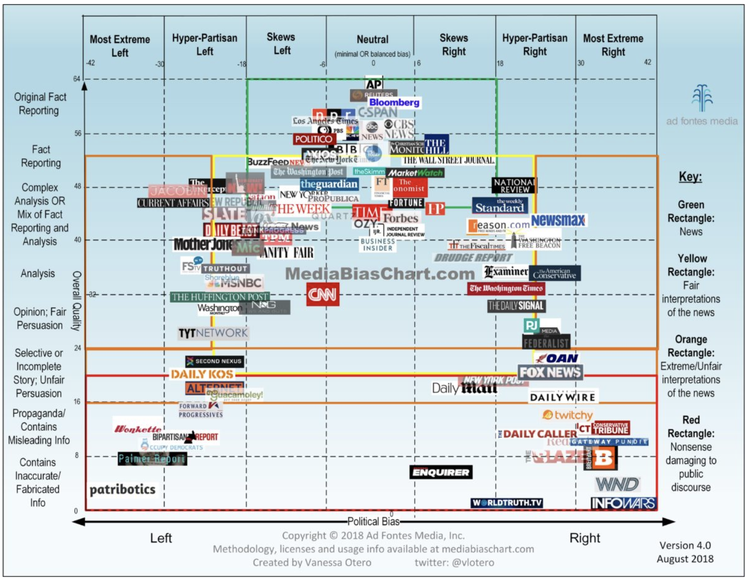

In [8]:
nb_setup.images_hconcat(["Media_Bias_Chart.png"], width = 750)

https://www.adfontesmedia.com/

# Paper
## Predicting Factuality of Reporting and Bias of News Media Sources

<br/>

**Ramy Baly, Georgi Karadzhov, Dimitar Alexandrov, James Glass, Preslav Nakov** <br/>
MIT Computer Science and Artificial Intelligence Laboratory, MA, USA <br/>
Qatar Computing Research Institute, HBKU, Qatar; <br/>
Sofia University, Bulgaria

## Background

* Focused on predicting **trustworthiness** (factuality and bias) of the **source** (the URL domain)
* Used features derived from:
  * Articles from the target website (to analyze: structure, sentiment, engagement, topic, complexity bias, morality)
  * Its Wikipedia page
  * Its Twitter account
  * The structure of its URL
  * Information about the Web traffic it has attracted
* This combination, as well as some of the sources, are novel for these problems.

## Method & Model
* Used information about **1,526** news media websites listed on the Media Bias/Fact Check website 
* Modeled factuality on a 3-point scale (**Low**, **Mixed**, and **High**)
* Bias on a 7-point scale (**Extreme-Left**, **Left**, **Center-Left**, **Center**, **Center-Right**, **Right**, and **Extreme-Right**)
* Used **Support Vector Machine (SVM)** classifier, training a separate model for factuality and for bias. 
* Report results for 5-fold cross-validation
* Performed an ablation study to evaluate the impact of removing one group of features at a time, as compared to using all the features


## Accuracy Output

## Other Similar Product
* Chrome Add-on
  * Owl Factor
  * Centr: Political Bias Detector
  * TrustedNews
* Media Bias/Fact Check Database
* FactCheck.org


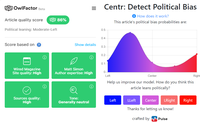

In [14]:
nb_setup.images_hconcat(["OwlFactor.png","Centr.png"], width = [100,100])

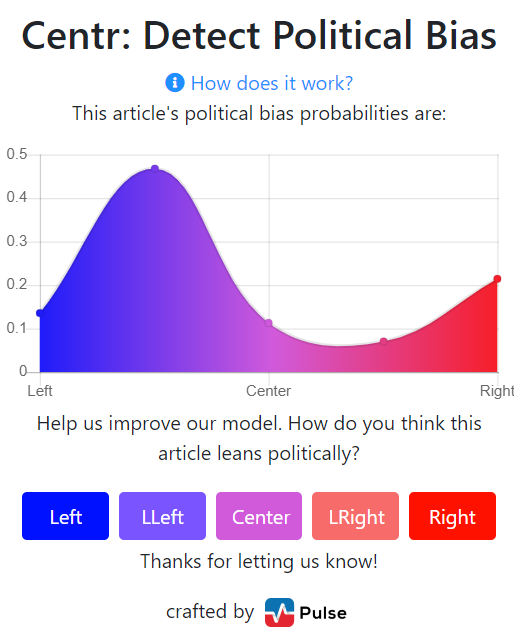

In [4]:
nb_setup.images_hconcat(["Centr.png"], width = 1000)

## Data Overview

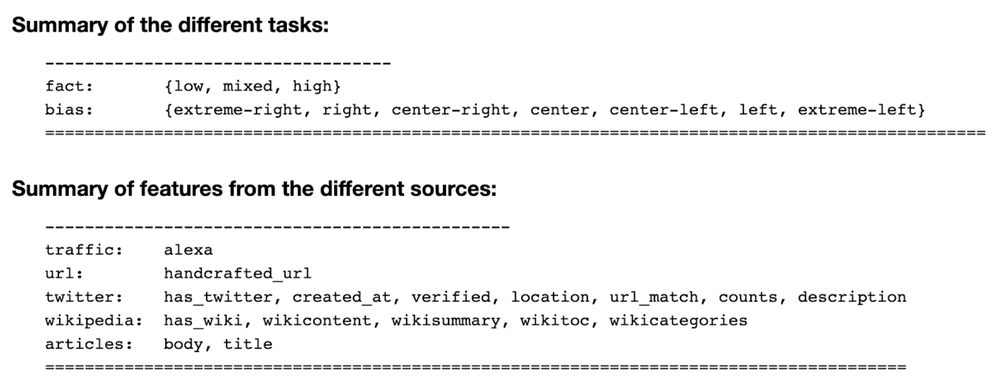

In [11]:
nb_setup.images_hconcat(["Data_Overview.png"], width = 2000)

### Label Counts in Dataset

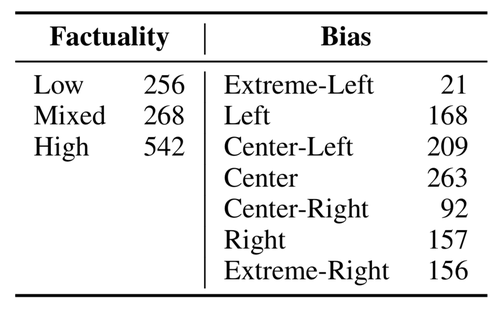

In [12]:
nb_setup.images_hconcat(["Label_Counts.png"], width = 500)

## Efficient Method for Detecting Media Factuality & Bias
Based on the MIT paper about detecting media fact and bias, we want to come up with a more efficient method. <br/>

In addition to the mainstream research direction, which is to analyze sample articles from target news medium, the paper experiment with features derived from the news medium’s Wikipedia page, Twitter account, the structure of its URL and its web traffic. <br/>

By using variables in the category of **Wikipedia**, **Twitter** and **article title** as a proxy for credibility, we are able to produce a model that has **similar accuracy** and require **less computational power**. 


## Efficient Method for Detecting Media Factuality & Bias
- Goal: Improved model with better efficiency
- **Wikipedia** and **Twitter** as a proxy for credibility
- Similar accuracy and less computational power

# Models

## Logistic Classification

In [20]:
def Classification(features, task):
    X, y = GetFeaturesAndLabels(features, task)
    with codecs.open('data/splits.json', 'r') as f:
        splits = json.load(f)
    # placeholders to accumulate true and predicted labels
    y_true = []
    y_pred = []
    # start cross-validation
    for i in range(5):
        print('fold ' + str(i))
        # select training instances for current fold
        ids = splits[i]['train-{0}'.format(i)].split('\n')
        Xtr = np.delete(X[X.iloc[:, 0].isin(ids)].values, 0, axis=1).astype(float)
        ytr = np.asarray(y[X.iloc[:, 0].isin(ids)]).reshape(-1, y.shape[1])
        # select testing instances for current fold
        ids = splits[i]['test-{0}'.format(i)].split('\n')
        Xts = np.delete(X[X.iloc[:, 0].isin(ids)].values, 0, axis=1).astype(float)
        yts = np.asarray(y[X.iloc[:, 0].isin(ids)]).reshape(-1, y.shape[1])
        # min-max normalization of the data
        scaler = MinMaxScaler()
        scaler.fit(Xtr)
        Xtr = scaler.transform(Xtr)
        Xts = scaler.transform(Xts)
        logistic = linear_model.LogisticRegression()
        penalty = ['l1', 'l2']
        c=[0.01,0.1,1,10]
        hyperparameters = dict(C=c, penalty=penalty)
        # fine-tune SVM hyperparameters using the training data of current fold
        clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
        best_model = clf.fit(Xtr, ytr.reshape(-1,))
        # build final model for current fold using best parameters
        #CLF_fold = RandomForestClassifier(kernel=CLF.best_estimator_.kernel, gamma=CLF.best_estimator_.gamma, C=CLF.best_estimator_.C, probability=True)
        #CLF_fold.fit(Xtr, ytr.reshape(-1,))
        # preform prediction on test data
        yhat=best_model.predict(Xts)
        y_true.extend(yts)
        y_pred.extend(yhat.reshape(-1, 1))
    # transform actual and predicted labels from numpy arrays into lists
    y_true = [yt[0] for yt in y_true]
    y_pred = [yp[0] for yp in y_pred]
    print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
    print('Best C:', best_model.best_estimator_.get_params()['C'])

    return CalculatePerformance(y_true, y_pred, task)

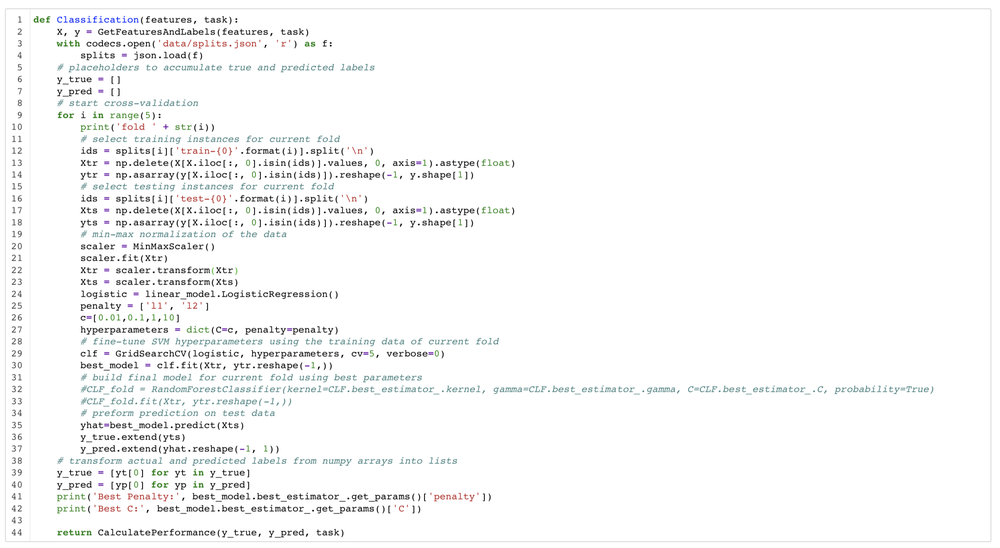

In [19]:
nb_setup.images_hconcat(["logistic_classification.png"], width = 1000)

## Random Forest

## Results
**Logistic regression + Lasso regularization** <br/>
similar F1 score for both <u>bias</u> and <u>facturality</u> prediction by just analyzing:
* **wiki content**
* **wiki verification** (!)
* **twitter account verification**
* **article title**

## Business Use
* **Potential product for small startup** <br/>
  Cost efficient and fast computation model to predict article’s bias and factuality

* Ability to **extend to all news websites**

* **Real-time** source prediction

## Future Improvement
* More training data:
  * Improve current model and enable more complicated model
  * Split data into training and testing set to gain more accurate model evaluation
* Whether author’s name is displayed or not (formatting)
* Update model over time in case fake website identify the importance of wiki and twitter account
* Sites association: social media interaction, common authors, sites plagiarism
* Credibility of website founder 


In [ ]:
# Split data into training and testing set to gain more accurate model evaluation???